In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
N_WORDS = 20000
MAX_LEN = 100
EMB_DIM = 200

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=N_WORDS)

x_train = sequence.pad_sequences(x_train, maxlen = MAX_LEN)
x_test = sequence.pad_sequences(x_test, maxlen = MAX_LEN)

In [4]:
model = Sequential()
model.add(Embedding(N_WORDS, EMB_DIM, input_length=MAX_LEN))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 200)          4000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               135680    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 4,152,321
Trainable params: 4,152,321
Non-trainable params: 0
_________________________________________________________________


In [5]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 348s 14ms/step - loss: 0.4438 - acc: 0.7840 - val_loss: 0.3412 - val_acc: 0.8511
Epoch 2/5
25000/25000 [==============================] - 351s 14ms/step - loss: 0.2303 - acc: 0.9109 - val_loss: 0.3633 - val_acc: 0.8443
Epoch 3/5
25000/25000 [==============================] - 341s 14ms/step - loss: 0.1287 - acc: 0.9536 - val_loss: 0.5411 - val_acc: 0.8346
Epoch 4/5
25000/25000 [==============================] - 338s 14ms/step - loss: 0.0628 - acc: 0.9790 - val_loss: 0.6839 - val_acc: 0.8334
Epoch 5/5
25000/25000 [==============================] - 343s 14ms/step - loss: 0.0414 - acc: 0.9857 - val_loss: 0.8524 - val_acc: 0.8284


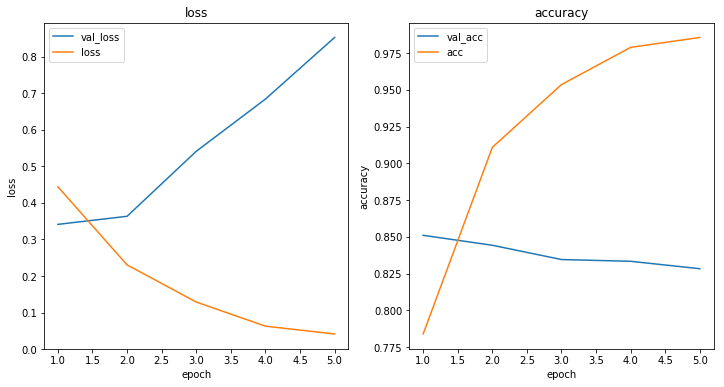

In [7]:
his = hist.history
epochs = list(range(1, 6))
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title('loss')
plt.plot(epochs, his['val_loss'], label='val_loss')
plt.plot(epochs, his['loss'], label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(122)
plt.title('accuracy')
plt.plot(epochs, his['val_acc'], label='val_acc')
plt.plot(epochs, his['acc'], label='acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.show()